# Training Materials: Visualization of ALOS-2/PALSAR-2 Data using Python

## Module 1: Introduction to ALOS-2/PALSAR-2 Data

### 1.1 Overview of ALOS-2 Satellite
- ALOS-2 (Advanced Land Observing Satellite-2) is a Japanese Earth observation satellite equipped with an L-band synthetic aperture radar (SAR).  It provides high-resolution imagery regardless of weather conditions, making it valuable for various applications.
- Preprocessing is crucial for enhancing the quality and interpretability of ALOS-2 data by mitigating inherent noise and ensuring accurate measurements.

### 1.2 Applications of ALOS-2 Data
- Focusing on forest monitoring, change detection, and plantation mapping .


## Module 2: Reading and Visualizing ALOS-2 Data

### 2.1 Required Libraries

- Setting up the Environment

In [ ]:
!pip install rasterio matplotlib numpy geopandas scikit-image scipy

### 2.2 Reading and Visualizing ALOS-2 Data
* Understanding GeoTIFF format 
* Loading ALOS-2 data using rasterio
* Basic visualization with matplotlib
* Applying colormaps for enhanced visualization (Optional)
* Generating histograms of pixel values

### 2.3 Data downloading
- ALOS-2 data can be obtained from the Japan Aerospace Exploration Agency (JAXA).
- Ensure the data is in GeoTIFF format for compatibility with the provided code.

In [ ]:
! curl --output 1-demo_data.zip http://owncloud.glodal-inc.net/owncloud/index.php/s/uKogtY6XPfokBVN/download
import shutil, os
os.makedirs('1-demo_data', exist_ok=True)
shutil.unpack_archive("1-demo_data.zip", "1-demo_data")
os.chdir('1-demo_data')
os.listdir()

### 2.4 Loading ALOS-2 Data with `rasterio`
- Provide hands-on examples of loading GeoTIFF data (Towards Data Science reference, provided code examples).

In [8]:
import rasterio

# Replace with your actual file path
filepath = '/home/jovyan/shared/PCN/ALOS-2/GEN_AI/1-demo_data/Alos_2_2007_HV.tif'

with rasterio.open(filepath) as src:
    # Read the first band
    band1 = src.read(1)
    
    # Access metadata
    metadata = src.meta
    print(metadata)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 9000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00022222222222222223, 0.0, 100.0,
       0.0, -0.00022222222222222223, 2.0)}


### 2.5 Basic Visualization with `matplotlib`
- Demonstrate displaying single-band SAR images using `imshow` (provided code examples).
- Explain colormaps and their use in SAR visualization.
- Show how to create titles, labels, colorbars, and adjust figure size.

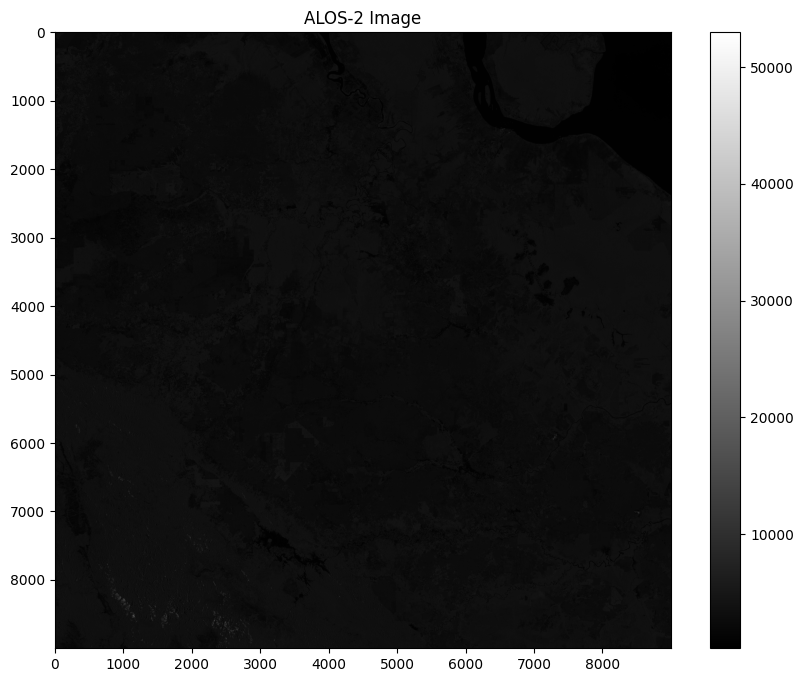

In [37]:
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HV.tif') as src:
    image_data = src.read(1) # Read the first band
    metadata = src.meta
    crs = src.crs
    transform = src.transform

plt.figure(figsize=(10, 8))
plt.imshow(image_data, cmap='gray')
plt.title('ALOS-2 Image')
plt.colorbar()
plt.show()


### 2.6 Generating RGB Composites

Assign PALSAR-2 HH/HV to RGB channels (red, green, blue) to analyze land cover and land use from features on the image. Follow the steps below to visualize a SAR image.

Let's look at the HH and HV images respectively before color compositing. We deal with annual composite data for the years 2007 and 2010. Specify a file name in rasterio and load the image data.

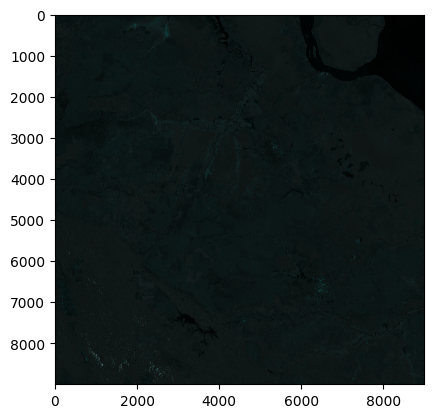

In [14]:
# Creating an RGB composite
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Load images (replace with your actual file paths)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HV.tif') as src1:
    band1 = src1.read(1)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HH.tif') as src2:
    band2 = src2.read(1)

# Normalize bands
band1_norm = (band1 - band1.min()) / (band1.max() - band1.min())
band2_norm = (band2 - band2.min()) / (band2.max() - band2.min())

# Create RGB composite
rgb = np.dstack([band1_norm, band2_norm, band2_norm])

# Display
plt.imshow(rgb)
plt.show()

The overals l darknesmakes interpretation difficult. Adjust the contrast.

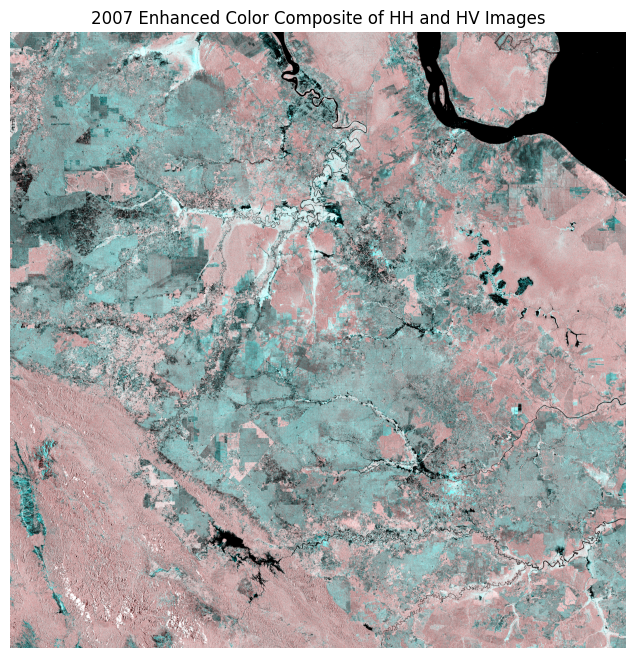

In [20]:
# Create RGB composite for 2007
rgb_composite_2007 = np.dstack([band1_norm, band2_norm, band2_norm])

# Enhance 2007 composite
rgb_composite_enhanced_2007 = enhance_composite(rgb_composite_2007)

# Plot the enhanced composite for 2007
plt.figure(figsize=(8, 8))
plt.imshow(rgb_composite_enhanced_2007)
plt.title("2007 Enhanced Color Composite of HH and HV Images")
plt.axis("off")
plt.show()


Color compositing and contrast adjustment allow interpretation of land cover and land use in the target area. The red region indicates greater scattering of HH compared to HV, and the blue-white region indicates greater scattering of HV compared to HH.

### 2.7 Histogram Analysis
- Explain how histograms represent pixel value distribution.
- Demonstrate computing and plotting histograms with `matplotlib` (provided code examples).

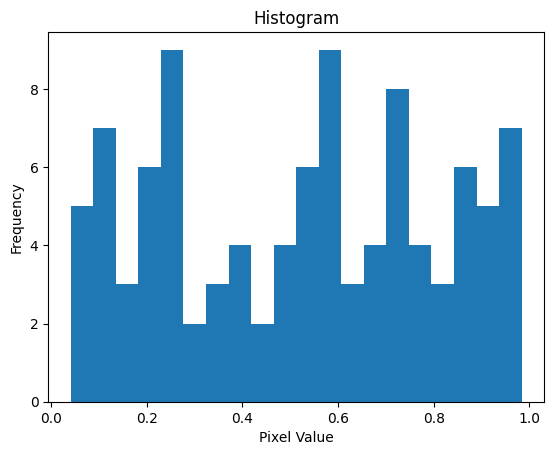

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
data = np.random.rand(10, 10)

plt.hist(data.flatten(), bins=20)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()